<a href="https://colab.research.google.com/github/PouyaRepos/sequential_anomaly_detection/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Clone the repo so Colab can access all the files, including utilities.py
!git clone https://github.com/PouyaRepos/sequential_anomaly_detection.git
%cd sequential_anomaly_detection


Cloning into 'sequential_anomaly_detection'...
remote: Enumerating objects: 18804, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18804 (delta 8), reused 9 (delta 4), pack-reused 18785 (from 2)
Receiving objects: 100% (18804/18804), 118.37 MiB | 7.14 MiB/s, done.
Resolving deltas: 100% (1659/1659), done.
/content/sequential_anomaly_detection


In [3]:
from utilities import NoisyLearningAlgorithm
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


Classifying digits e.g. y = 5 v.s. all other numbers between 0 to 9. The algorithm queries agent to label chosen points for n_budget =200 times, then creates a classifier to label rest of the points itself.

Query budget: 200
dataset size: 1797
Feature space deimension: 64
Sum of explained variance with 2 components: 0.28509364823699285


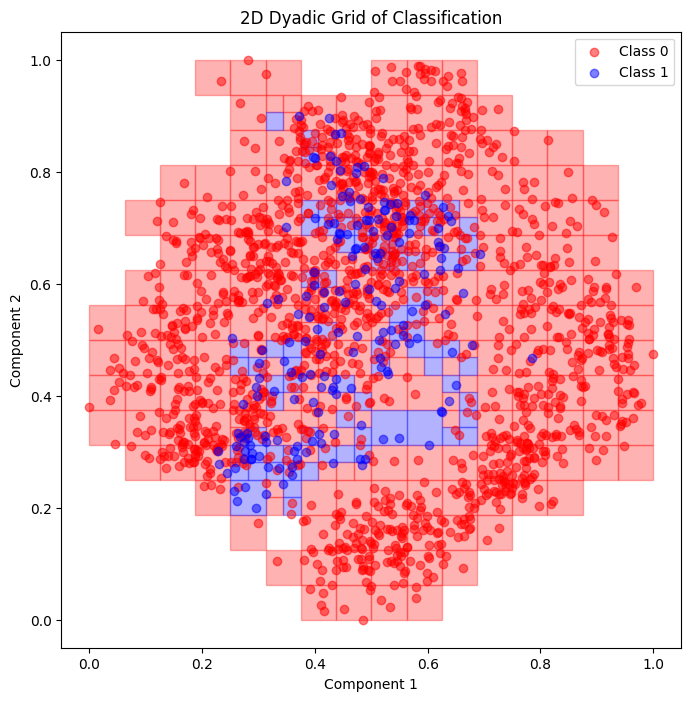

Model: NoisyLearningAlgorithm
Mean Accuracy: 0.8375
Mean AUC-ROC: 0.6561
report:                      0           1  accuracy    macro avg  weighted avg
precision     0.932071    0.293233  0.837507     0.612652      0.867369
recall        0.883591    0.428571  0.837507     0.656081      0.837507
f1-score      0.907184    0.348214  0.837507     0.627699      0.850571
support    1615.000000  182.000000  0.837507  1797.000000   1797.000000


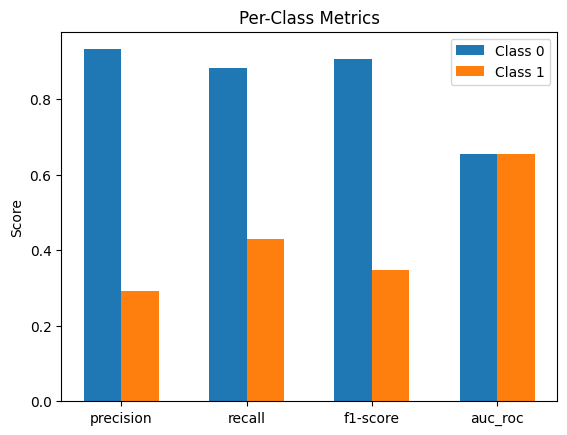

In [4]:
# Case y = 5


digits = load_digits()
X, y = digits.data, digits.target
labels = (y == 5).astype(int)  # Binary classification: 1 if digit is 1, else 0. y could be any number in [0, 9]

# Reduce dimension by PCA and scale to [0,1]^k
n_budget = 200 # Query budget
feature_dimension = 2 # for feature_dimension = 2 and 3, it plots the 2D or #d dyadic grid
pca = PCA(n_components=feature_dimension)
X_pca = pca.fit_transform(X)
scaler = MinMaxScaler(feature_range=(0, .9999999))
data = scaler.fit_transform(X_pca)

#### Meta info
print(f'Query budget: {n_budget}')
print(f'dataset size: {X.shape[0]}')
print(f'Feature space deimension: {X.shape[1]}')
print(f'Sum of explained variance with {feature_dimension} components: {sum(pca.fit(X).explained_variance_ratio_)}')

# Run algorithm
algo = NoisyLearningAlgorithm(n_budget=n_budget, delta=0.05, alpha=0.01, lambda_=1.0, feature_dimension= feature_dimension, B_l_alpha= .3, initial_depth_level= 4)
s0, s1, ac, results= algo.run(data, labels)
algo.plot_dyadic_grid(data,labels)
algo.evaluate_model(data, labels)

Query budget: 100
dataset size: 1797
Feature space deimension: 64
Sum of explained variance with 3 components: 0.40303958587675076


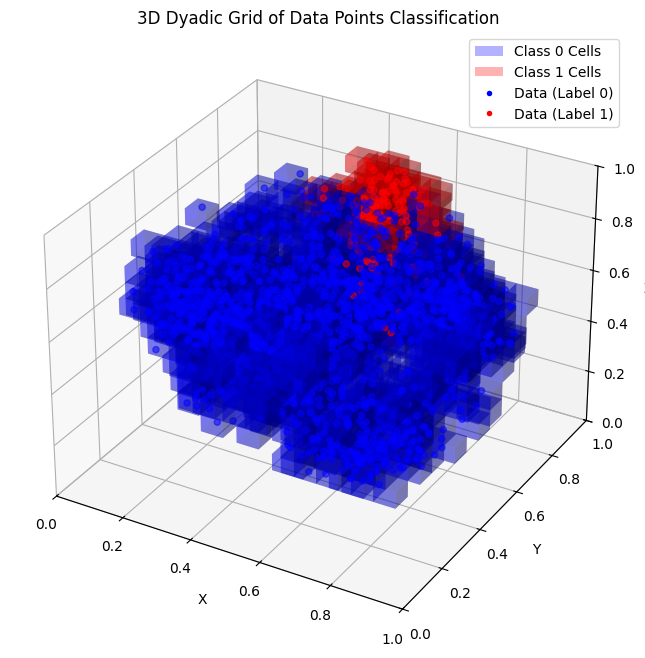

Model: NoisyLearningAlgorithm
Mean Accuracy: 0.9666
Mean AUC-ROC: 0.9020
report:                      0           1  accuracy    macro avg  weighted avg
precision     0.980271    0.840000  0.966611     0.910136      0.966299
recall        0.982695    0.821229  0.966611     0.901962      0.966611
f1-score      0.981481    0.830508  0.966611     0.905995      0.966443
support    1618.000000  179.000000  0.966611  1797.000000   1797.000000


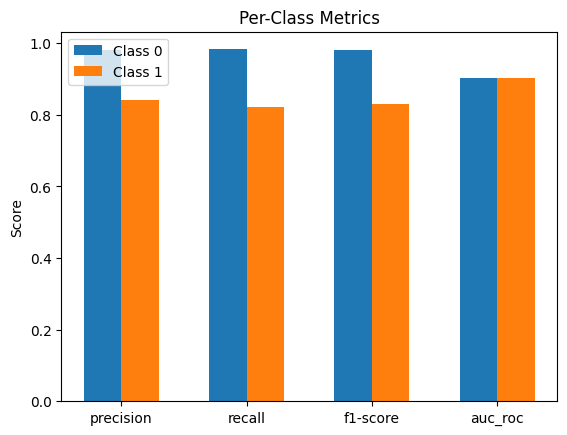

In [6]:
# Case y = 7

digits = load_digits()
X, y = digits.data, digits.target
labels = (y == 7).astype(int)  # Binary classification: 1 if digit is 1, else 0. y could be any number in [0, 9]

# Reduce dimension by PCA and scale to [0,1]^k
n_budget = 100 # Query budget
feature_dimension = 3 # for feature_dimension = 2 and 3, it plots the 2D or #d dyadic grid
pca = PCA(n_components=feature_dimension)
X_pca = pca.fit_transform(X)
scaler = MinMaxScaler(feature_range=(0, .9999999))
data = scaler.fit_transform(X_pca)

#### Meta info
print(f'Query budget: {n_budget}')
print(f'dataset size: {X.shape[0]}')
print(f'Feature space deimension: {X.shape[1]}')
print(f'Sum of explained variance with {feature_dimension} components: {sum(pca.fit(X).explained_variance_ratio_)}')

# Run algorithm
algo = NoisyLearningAlgorithm(n_budget=n_budget, delta=0.05, alpha=0.01, lambda_=1.0, feature_dimension= feature_dimension, B_l_alpha= .3, initial_depth_level= 4)
s0, s1, ac, results= algo.run(data, labels)
algo.plot_dyadic_grid(data,labels)
algo.evaluate_model(data, labels)

The algorithm has selected 100 of the most informative points (almost 10% of the dataset) and queried the agent to label them. Based on this information, it then determines the boundaries for classification. This classifier will be used to label the rest of the 1700 data points with 96% average accuracy.